In [22]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/churn.txt")

# denoting churn and duration
df["event"] = np.where(df["Churn?"] == "False.", 0, 1)
df = df.rename(columns={"Account Length": "duration"})

del df['Churn?']

df = df.dropna()
df = df.drop_duplicates()
df.head()

,State,duration,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,event
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,1
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,0
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,0
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,0
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,1


In [23]:
print("Total Records:",df.shape[0],"\n")
print("Percent Churn Rate:",df.event.mean())
print("")
print("Duration Intervals")
print(df['duration'].describe())

Total Records: 5000 

Percent Churn Rate: 0.4996

Duration Intervals
count    5000.000000
mean      101.675800
std        57.596762
min         1.000000
25%        52.000000
50%       102.000000
75%       151.000000
max       200.000000
Name: duration, dtype: float64


In [26]:
df.columns

Index(['State', 'duration', 'Area Code', 'Phone', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'event'],
      dtype='object')

In [30]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a947b4192a1ba5242797e98693b38995dbd7b0838646999a67e31da73d162ebf
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


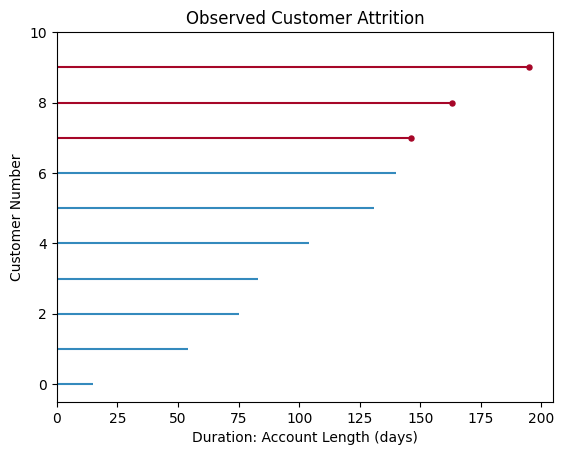

In [32]:
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

ax=plot_lifetimes(df.head(10)['duration'], df.head(10)['event'])
_=ax.set_xlabel("Duration: Account Length (days)")
_=ax.set_ylabel("Customer Number")
_=ax.set_title("Observed Customer Attrition")

🔴**Red lines with dot**- indicates when customer left with the exact duration as the dot

🔵**Blue line**- customers still active up until the measured duration

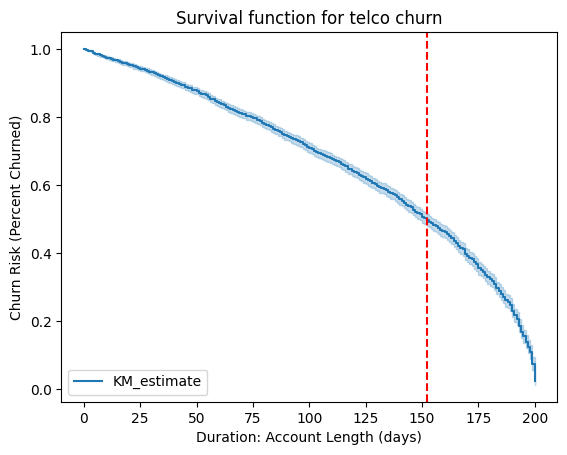

In [39]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf= KaplanMeierFitter()

kmf.fit(df['duration'],event_observed=df['event'])

kmf.plot_survival_function()
_=plt.title('Survival function for telco churn');
_=plt.xlabel("Duration: Account Length (days)")
_=plt.ylabel("Churn Risk (Percent Churned)")
_=plt.axvline(x=kmf.median_survival_time_, color='r',linestyle='--')

🔴red-line: where probability drops to 50%
This is the point by which half of customers have churned out